# Melakukan Klasifikasi pada Data Set (Bunga) Iris
---

Pada bagian ini akan dilakukan eksplorasi  _library_ sklearn dengan menggunakan dataset iris

## Pembacaan data ##
Pembacaan dataset iris dilakukan dengan menggunakan modul __datasets__ pada __sklearn__

In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()
X = iris_data.data
Y = iris_data.target
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


## Persiapan algoritma machine learning yang akan digunakan
Terdapat empat algoritma machine learning yang akan digunakan yaitu:
* [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)
* [Decision Tree Learning](http://scikit-learn.org/stable/modules/tree.html)
* [kNN](http://scikit-learn.org/stable/modules/neighbors.html )
* [Multi Layer Perceptron](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)

akan di lakukan __import__ modul-modul yang diperlukan dari _library_ __sklearn__ dan melakukan import fungsi untuk pengukuran kinerja model

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import graphviz

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.xkcd()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Pembelajaran

### 1. Melakukan pembelajaran penuh

### 1. Melakukan pembelajaran dengan train test split 90%(train) dan 10%(test)

Split dilakukan dengan menggunakan fungsi __train_test_split__ dari modul __model_selection__

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.1, shuffle=True,
                                                   stratify=iris_data.target)

#### A. Naive Bayes

* __Melakukan training pada data train__

In [14]:
model_NB = GaussianNB()
print("Start Naive Bayes Model training...")
model_NB.fit(X_train, y_train) #MELAKUKAN TRAINING
print("Training done...")

Start Naive Bayes Model training...
Training done...


* __Melakukan prediksi pada data test__

In [15]:
y_hat = model_NB.predict(X_test) #Hasil prediksi disimpan dalam sebuah vektor y_hat

* __Menampilkan model/hipotesis__

* __Mengukur kinerja model__


In [16]:
print(classification_report(y_test, y_hat, target_names=iris_data.target_names))
print("Accuracy:", accuracy_score(y_test,y_hat)*100,end=""); print("%")

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         5
 versicolor       0.80      0.80      0.80         5
  virginica       0.80      0.80      0.80         5

avg / total       0.87      0.87      0.87        15

Accuracy: 86.6666666667%


* __Menampilkan confusion matrix__

[[5 0 0]
 [0 4 1]
 [0 1 4]]


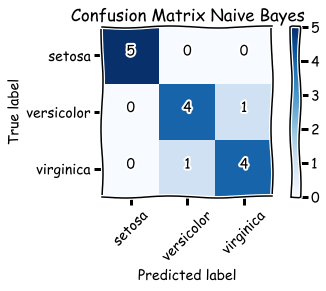

In [17]:
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris_data.target_names,
                      title='Confusion Matrix Naive Bayes')
plt.show()

* __Menyimpan model ke file eksternal__

In [18]:
from sklearn.externals import joblib
joblib.dump(model_NB, 'models/NaiveBayes.pkl')

['models/NaiveBayes.pkl']

#### B. Decision Tree
* __Melakukan training pada data train__

In [19]:
model_DTL = DecisionTreeClassifier(criterion='entropy')
print("Start DTL training...")
model_DTL = model_DTL.fit(X_train, y_train) #MELAKUKAN TRAINING
print("Training done...")

Start DTL training...
Training done...


* __Melakukan prediksi pada data test__

In [20]:
y_hat = model_DTL.predict(X_test)

* __Menampilkan model/hipotesis__

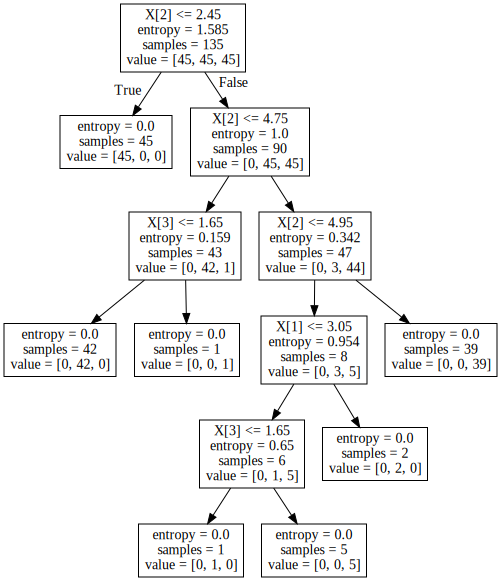

In [22]:
import graphviz
from IPython.display import Image
from sklearn import tree
dot_data = tree.export_graphviz(model_DTL, out_file = None)
graph = graphviz.Source(dot_data)
graph.render("Iris")

display(graph)

* __Mengukur kinerja model__

In [23]:
print(classification_report(y_test, y_hat, target_names=iris_data.target_names))
print("Accuracy:", accuracy_score(y_test,y_hat)*100,end=""); print("%")

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         5
 versicolor       1.00      0.60      0.75         5
  virginica       0.71      1.00      0.83         5

avg / total       0.90      0.87      0.86        15

Accuracy: 86.6666666667%


* __Menampilkan confusion matrix__

[[5 0 0]
 [0 3 2]
 [0 0 5]]


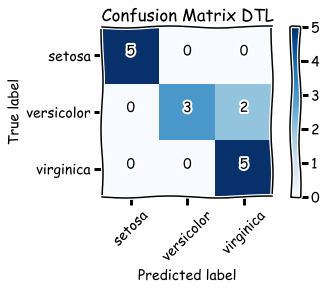

In [24]:
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris_data.target_names,
                      title='Confusion Matrix DTL')
plt.show()

* __Menyimpan model ke file eksternal__

In [25]:
joblib.dump(model_DTL, 'models/DTL.pkl')

['models/DTL.pkl']

#### C. kNN
* __Melakukan training pada data train__

In [26]:
model_kNN = KNeighborsClassifier(n_neighbors=5)
print("Start kNN training...")
model_kNN.fit(X_train, y_train) #MELAKUKAN TRAINING
print("Training done...")

Start kNN training...
Training done...


* __Melakukan prediksi pada data test__

In [27]:
y_hat = model_kNN.predict(X_test)

In [28]:
print(classification_report(y_test, y_hat, target_names=iris_data.target_names))
print("Accuracy:", accuracy_score(y_test,y_hat)*100,end=""); print("%")

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         5
 versicolor       1.00      0.60      0.75         5
  virginica       0.71      1.00      0.83         5

avg / total       0.90      0.87      0.86        15

Accuracy: 86.6666666667%


[[5 0 0]
 [0 3 2]
 [0 0 5]]


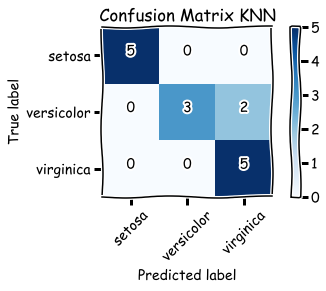

In [29]:
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris_data.target_names,
                      title='Confusion Matrix KNN')
plt.show()

In [30]:
joblib.dump(model_kNN, 'models/kNN.pkl')

['models/kNN.pkl']

#### D. Multi Layer Perceptron

In [31]:
model_MLP = MLPClassifier(activation='relu', hidden_layer_sizes=(10,),max_iter=1000, random_state=10)
print("Start MLP training...")
model_MLP.fit(X_train, y_train) #MELAKUKAN TRAINING
print("Training done...")

Start MLP training...
Training done...


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [32]:
y_hat = model_MLP.predict(X_test)

In [33]:
print(classification_report(y_test, y_hat, target_names=iris_data.target_names))
print("Accuracy:", accuracy_score(y_test,y_hat)*100,end=""); print("%")

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         5
 versicolor       1.00      0.60      0.75         5
  virginica       0.71      1.00      0.83         5

avg / total       0.90      0.87      0.86        15

Accuracy: 86.6666666667%


* __Menampilkan model/hipotesis__

In [34]:
import pandas
df = pandas.DataFrame({'fully connected layers' : y_hat})
df

,fully connected layers
0,2
1,2
2,0
3,2
4,2
5,1
6,2
7,1
8,0
9,0


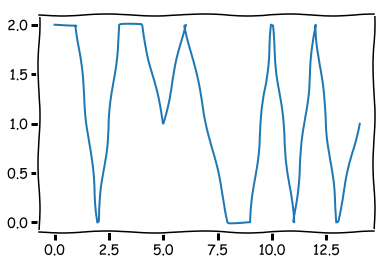

In [35]:
plt.plot(df)
plt.show()

* __Menampilkan Confusion Matriks__

[[5 0 0]
 [0 3 2]
 [0 0 5]]


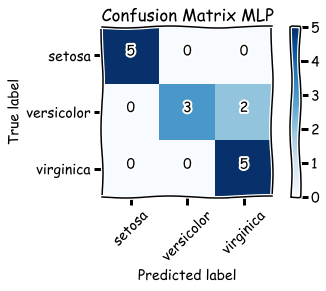

In [36]:
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris_data.target_names,
                      title='Confusion Matrix MLP')
plt.show()

In [37]:
joblib.dump(model_MLP, 'models/MLP.pkl')

['models/MLP.pkl']

### 2. Melakukan pembelajaran dengan 10-fold cross validation

cross validation menggunakan class __StratifiedKFold__

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
folds = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
folds.get_n_splits(iris_data.data, iris_data.target)

10

### A. Training

In [39]:
model_NB_KF = GaussianNB()
model_DTL_KF = DecisionTreeClassifier(criterion='entropy')
model_kNN_KF = KNeighborsClassifier(n_neighbors=5)
model_MLP_KF = MLPClassifier(hidden_layer_sizes=(10,), random_state=10, max_iter=1000)

accuracy_NB = []
accuracy_DTL = []
accuracy_kNN = []
accuracy_MLP = []

recall_mean_NB = []
recall_mean_DTL = []
recall_mean_kNN = []
recall_mean_MLP = []

prec_mean_NB = []
prec_mean_DTL = []
prec_mean_kNN = []
prec_mean_MLP = []

In [40]:
for train_index, test_index in folds.split(iris_data.data, iris_data.target):
    X_train, X_test = iris_data.data[train_index], iris_data.data[test_index]
    y_train, y_test = iris_data.target[train_index], iris_data.target[test_index]
    #Train ALL MODEL
    model_NB_KF.fit(X_train, y_train)
    model_DTL_KF.fit(X_train, y_train)
    model_kNN_KF.fit(X_train, y_train)
    model_MLP_KF.fit(X_train, y_train)
    #Pedict the y
    y_hat_NB = model_NB_KF.predict(X_test)
    y_hat_DTL = model_DTL_KF.predict(X_test)
    y_hat_kNN = model_kNN_KF.predict(X_test)
    y_hat_MLP = model_MLP_KF.predict(X_test)
    #Measure performance
    accuracy_NB.append(accuracy_score(y_test, y_hat_NB))
    accuracy_DTL.append(accuracy_score(y_test, y_hat_DTL))
    accuracy_kNN.append(accuracy_score(y_test, y_hat_kNN))
    accuracy_MLP.append(accuracy_score(y_test, y_hat_MLP))
    
    prec_mean_NB.append(precision_score(y_test, y_hat_NB, average='macro'))
    prec_mean_DTL.append(precision_score(y_test, y_hat_DTL,average='macro'))
    prec_mean_kNN.append(precision_score(y_test, y_hat_kNN,average='macro'))
    prec_mean_MLP.append(precision_score(y_test, y_hat_MLP,average='macro'))
    
    recall_mean_NB.append(recall_score(y_test, y_hat_NB, average='macro'))
    recall_mean_DTL.append(recall_score(y_test, y_hat_DTL,average='macro'))
    recall_mean_kNN.append(recall_score(y_test, y_hat_kNN,average='macro'))
    recall_mean_MLP.append(recall_score(y_test, y_hat_MLP,average='macro'))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### B. Mengukur kinerja model

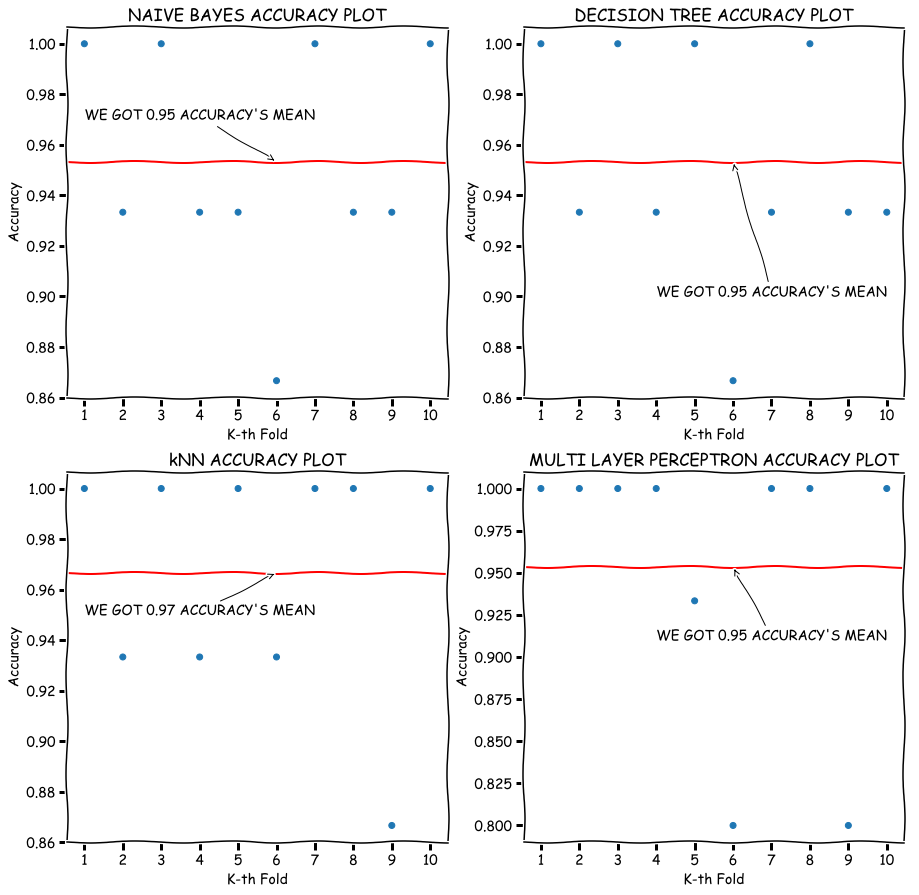

In [41]:
plt.figure(1,figsize=(15,15))

#NAIVE BAYES PLOT
plt.subplot(221)
plt.title("NAIVE BAYES ACCURACY PLOT")
plt.xlabel("K-th Fold")
plt.ylabel("Accuracy")
plt.xticks(range(10),range(1,11))
#plt.yticks([np.mean(accuracy_NB)],[0.95])
plt.plot(accuracy_NB, 'o')
plt.axhline(y=np.mean(accuracy_NB), color='r', linestyle='-')
plt.annotate("WE GOT %.2f ACCURACY'S MEAN" % np.mean(accuracy_NB), xy=(5,np.mean(accuracy_NB)),
            arrowprops=dict(arrowstyle='->'), xytext=(0,0.97))


plt.subplot(222)
plt.xticks(range(10),range(1,11))
plt.title("DECISION TREE ACCURACY PLOT")
plt.xlabel("K-th Fold")
plt.ylabel("Accuracy")
#plt.yticks([np.mean(accuracy_NB)],[0.95])
plt.plot(accuracy_DTL, 'o')
plt.axhline(y=np.mean(accuracy_DTL), color='r', linestyle='-')
plt.annotate("WE GOT %.2f ACCURACY'S MEAN" % np.mean(accuracy_DTL), xy=(5,np.mean(accuracy_DTL)),
            arrowprops=dict(arrowstyle='->'), xytext=(3,0.90))


plt.subplot(223)
plt.title("kNN ACCURACY PLOT")
plt.xlabel("K-th Fold")
plt.ylabel("Accuracy")
plt.xticks(range(10),range(1,11))
#plt.yticks([np.mean(accuracy_NB)],[0.95])
plt.plot(accuracy_kNN, 'o')
plt.axhline(y=np.mean(accuracy_kNN), color='r', linestyle='-')
plt.annotate("WE GOT %.2f ACCURACY'S MEAN" % np.mean(accuracy_kNN), xy=(5,np.mean(accuracy_kNN)),
            arrowprops=dict(arrowstyle='->'), xytext=(0,0.95))

plt.subplot(224)
plt.title("MULTI LAYER PERCEPTRON ACCURACY PLOT")
plt.xlabel("K-th Fold")
plt.ylabel("Accuracy")
plt.xticks(range(10),range(1,11))
#plt.yticks([np.mean(accuracy_NB)],[0.95])
plt.plot(accuracy_MLP, 'o')
plt.axhline(y=np.mean(accuracy_MLP), color='r', linestyle='-')
plt.annotate("WE GOT %.2f ACCURACY'S MEAN" % np.mean(accuracy_MLP), xy=(5,np.mean(accuracy_MLP)),
            arrowprops=dict(arrowstyle='->'), xytext=(3,0.91))
plt.show()

In [42]:
#PRINT PRECISION MEAN
print("PRECISION MEAN")
print("---------------------------------------------")
print("Naive Bayes: %.2f (+/-)" % np.mean(prec_mean_NB),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_NB)))
print("DTL: %.2f (+/-)" % np.mean(prec_mean_DTL),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_DTL)))
print("KNN: %.2f (+/-)" % np.mean(prec_mean_kNN),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_kNN)))
print("MLP: %.2f (+/-)" % np.mean(prec_mean_MLP),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_MLP)))

PRECISION MEAN
---------------------------------------------
Naive Bayes: 0.96 (+/-) 0.08
DTL: 0.96 (+/-) 0.07
KNN: 0.97 (+/-) 0.07
MLP: 0.96 (+/-) 0.13


In [43]:
#PRINT PRECISION MEAN
print("RECALL MEAN")
print("---------------------------------------------")
print("Naive Bayes: %.2f (+/-)" % np.mean(recall_mean_NB),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_NB)))
print("DTL: %.2f (+/-)" % np.mean(recall_mean_DTL),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_DTL)))
print("KNN: %.2f (+/-)" % np.mean(recall_mean_kNN),end=' ')
print("%.2f" % (2.0*np.std(recall_mean_kNN)))
print("MLP: %.2f (+/-)" % np.mean(recall_mean_MLP),end=' ')
print("%.2f" % (2.0*np.std(recall_mean_MLP)))

RECALL MEAN
---------------------------------------------
Naive Bayes: 0.95 (+/-) 0.08
DTL: 0.95 (+/-) 0.07
KNN: 0.97 (+/-) 0.09
MLP: 0.95 (+/-) 0.16


### Instance Baru

* __Ambil model dari file eksternal__

In [47]:
import pickle
NB = joblib.load("models/NaiveBayes.pkl")

* __Tambahkan instance Baru__

In [48]:
y = NB.predict([[4.7,  2.2,  3.5,  0.2]])
y[0]

1

* __Menggunakan model lain__

In [49]:
DTL = joblib.load("models/DTL.pkl")
y = DTL.predict([[4.7,  2.2,  3.5,  0.2]])
y[0]

1

In [50]:
kNN = joblib.load("models/kNN.pkl")
y = kNN.predict([[4.7,  2.2,  3.5,  0.2]])
y[0]

1

In [51]:
MLP = joblib.load("models/MLP.pkl")
y = MLP.predict([[4.7,  2.2,  3.5,  0.2]])
y[0]

1

### Menggunakan dataset play_tennis

* __Mengambil data dari file eksternal csv__

In [52]:
import pandas
import numpy
tennis = pandas.read_csv("models/play_tennis.csv")
print(tennis)

     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no
